In [2]:
from morph import *
import numpy as np
from skimage import io
from skimage.morphology import erosion, dilation
from mpl_toolkits.axes_grid1 import AxesGrid
#import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [18*20, 12*20]
import matplotlib.pyplot as plt

%matplotlib inline

### Testing different filters with a 3x3 structuring element

/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/er_square3x3_selem.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/di_square3x3_selem.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/op_square3x3_selem.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/cl_square3x3_selem.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/ig_square3x3_selem.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/eg_square3x3_selem.png is a low contrast image
  warn(

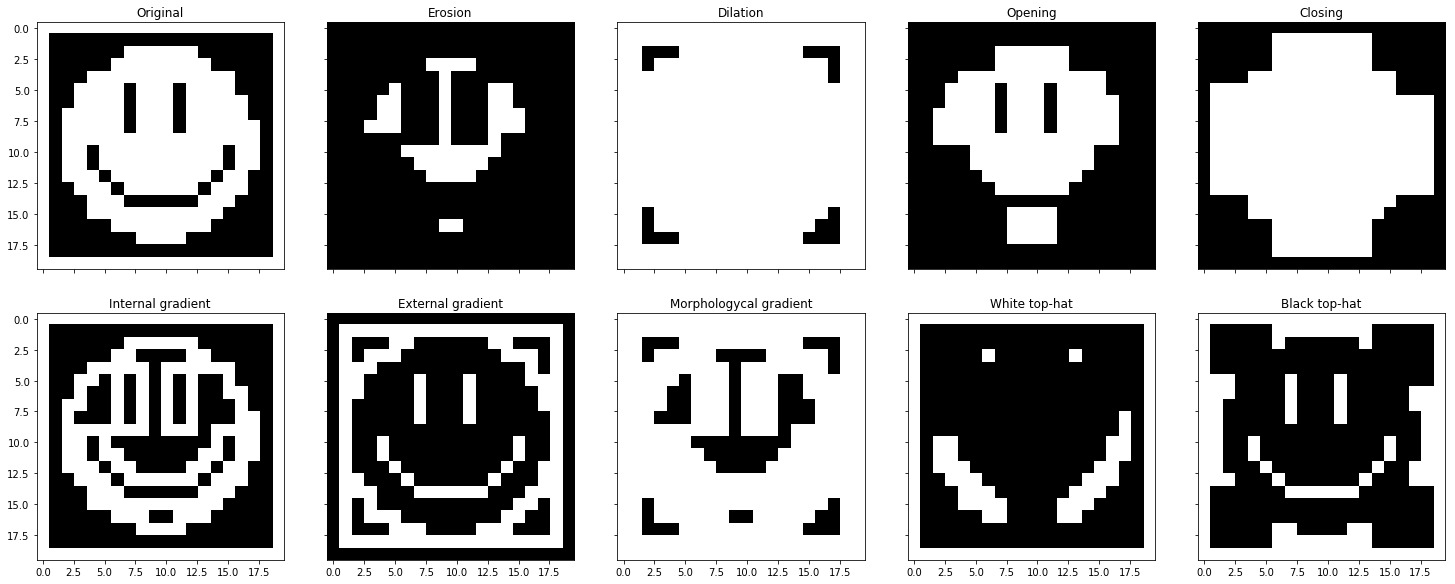

In [8]:
img = io.imread("images/smile.png", as_grey=True)
fig = plt.figure()
fig.set_figwidth(100)
fig.set_figheight(150)

fig.subplots_adjust(left=0.05, right=0.95)
grid = AxesGrid(fig, 141, nrows_ncols=(2, 5), axes_pad=0.6)

filters = ['original', 'er','di', 'op', 'cl', 'ig', 'eg', 'mg', 'wth', 'bth']
titles = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Internal gradient', 'External gradient', 'Morphologycal gradient', 'White top-hat', 'Black top-hat']

grid[0].set_title(titles[0])
grid[0].imshow(apply_threshold(img), cmap=plt.cm.binary_r)
for i, f in zip(range(1, len(filters)), filters[1:]):
    grid[i].set_title(titles[i])
    result = morph_filter(f, img)
    io.imsave("test_images/{}_square3x3_selem.png".format(f), result*255)
    grid[i].imshow(result, cmap=plt.cm.binary_r)
plt.savefig("images/filters.png")

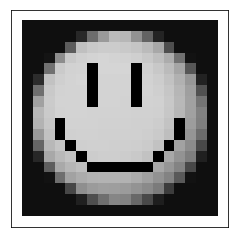

In [4]:
img = io.imread("images/smile.png", as_grey=True)
er = morph_filter("er", img)
show(img)

### Applying a filter multiple times

/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/erosion_1_times.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/erosion_2_times.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/erosion_3_times.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/erosion_4_times.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/erosion_5_times.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/erosion_6_times.png is a low contrast image
  warn('%s is a low contr

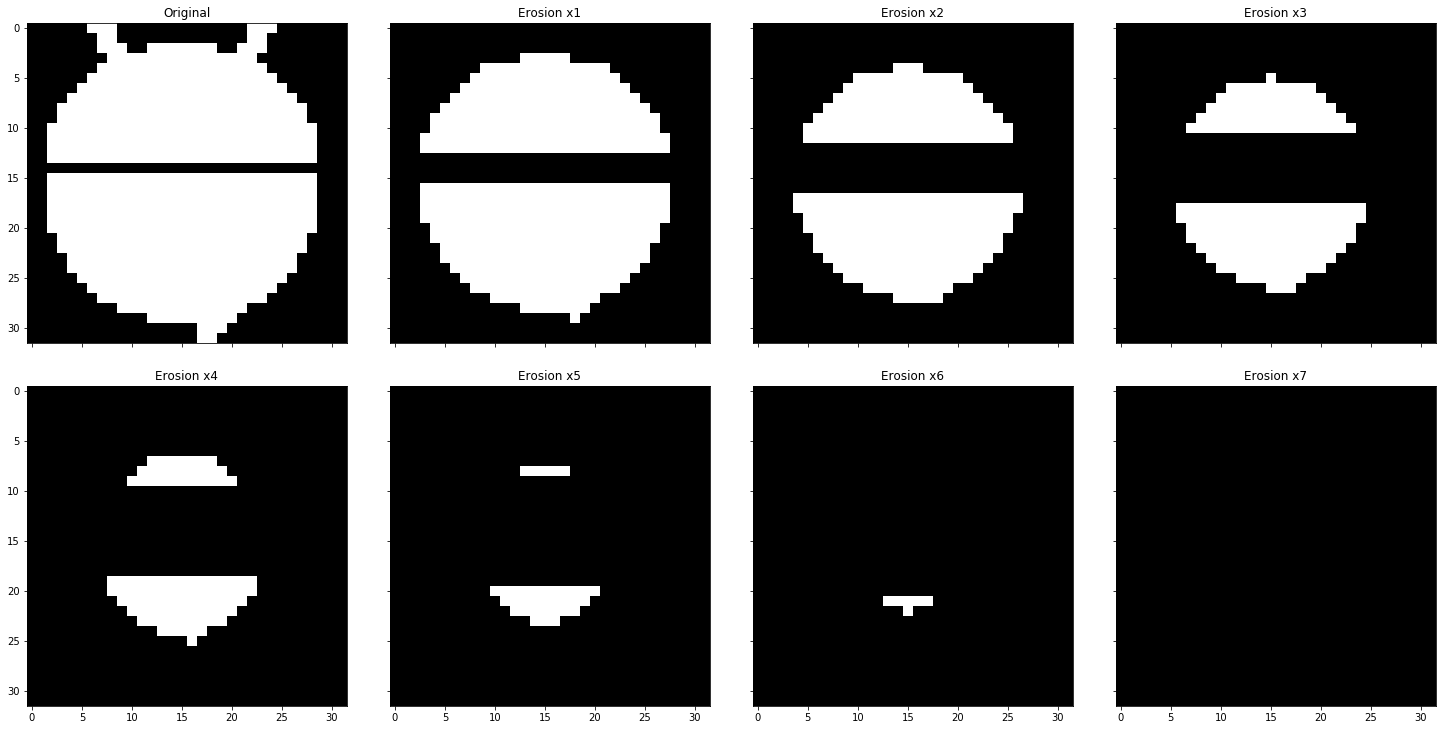

In [95]:
ico = io.imread("images/favicon.png", as_grey=True)

fig2 = plt.figure()
fig2.set_figwidth(100)
fig2.set_figheight(150)

fig2.subplots_adjust(left=0.05, right=0.95)
grid2 = AxesGrid(fig2, 141, nrows_ncols=(2, 4), axes_pad=0.6)

titles2 = ['Original', 'Erosion x1', 'Erosion x2', 'Erosion x3', 'Erosion x4', 'Erosion x5', 'Erosion x6', 'Erosion x7']


grid2[0].set_title(titles2[0])
grid2[0].imshow(apply_threshold(ico), cmap=plt.cm.binary_r)
for i in range(1, len(titles2)):
    grid2[i].set_title(titles2[i])
    result = morph_filter('er', ico, n_iterations=i)
    io.imsave("test_images/erosion_{}_times.png".format(i), result*255)
    grid2[i].imshow(result, cmap=plt.cm.binary_r)

plt.savefig("images/filters-multiple-times.png")

### Applying different types of structuring elements

/usr/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


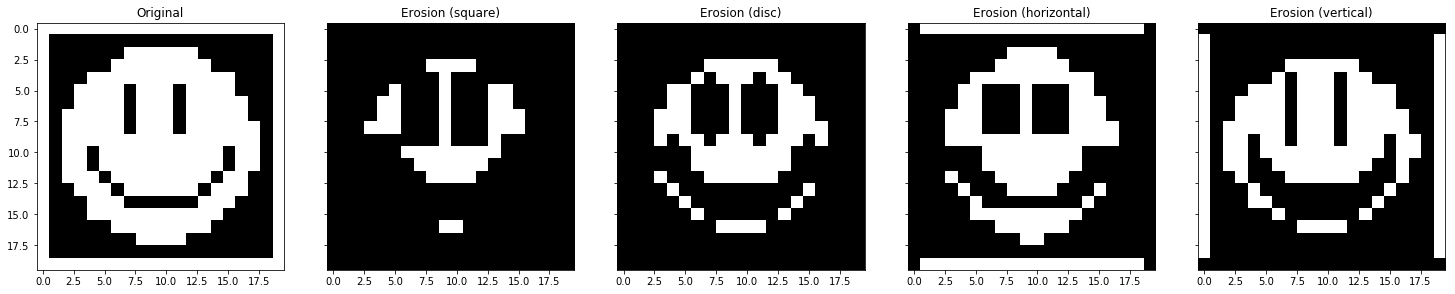

In [3]:
img = io.imread("images/smile.png", as_grey=True)
se1 = np.ones((3,3), dtype=np.uint8)

se2 = np.array([[0, 1, 0], 
               [1, 1, 1], 
               [0, 1, 0]], dtype=np.uint8)

se3 = np.array([[0, 0, 0], 
               [1, 1, 1], 
               [0, 0, 0]], dtype=np.uint8)

se4 = np.array([[0, 1, 0], 
               [0, 1, 0], 
               [0, 1, 0]], dtype=np.uint8)

fig3 = plt.figure()
fig3.set_figwidth(100)
fig3.set_figheight(150)

fig3.subplots_adjust(left=0.05, right=0.95)
grid3 = AxesGrid(fig3, 141, nrows_ncols=(1, 5), axes_pad=0.6)

titles3 = ['Original', 'Erosion (square)', 'Erosion (disc)', 'Erosion (horizontal)', 'Erosion (vertical)']
selem_names = ['square', 'disc', 'horizontal', 'vertical']

selems = [se1, se1, se2, se3, se4]

grid3[0].set_title(titles3[0])
grid3[0].imshow(apply_threshold(img), cmap=plt.cm.binary_r)
for i in range(1, len(titles3)):
    grid3[i].set_title(titles3[i])
    result = morph_filter('er', img, sel=selems[i])
    io.imsave("test_images/erosion_{}_selem.png".format(selem_names[i-1]), result)
    grid3[i].imshow(result, cmap=plt.cm.binary_r)

plt.savefig("images/filters-multiple-selem.png")

### Applying different sizes of structuring elements

/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/erosion_3x3_selem.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/erosion_5x5_selem.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/erosion_7x7_selem.png is a low contrast image
  warn('%s is a low contrast image' % fname)


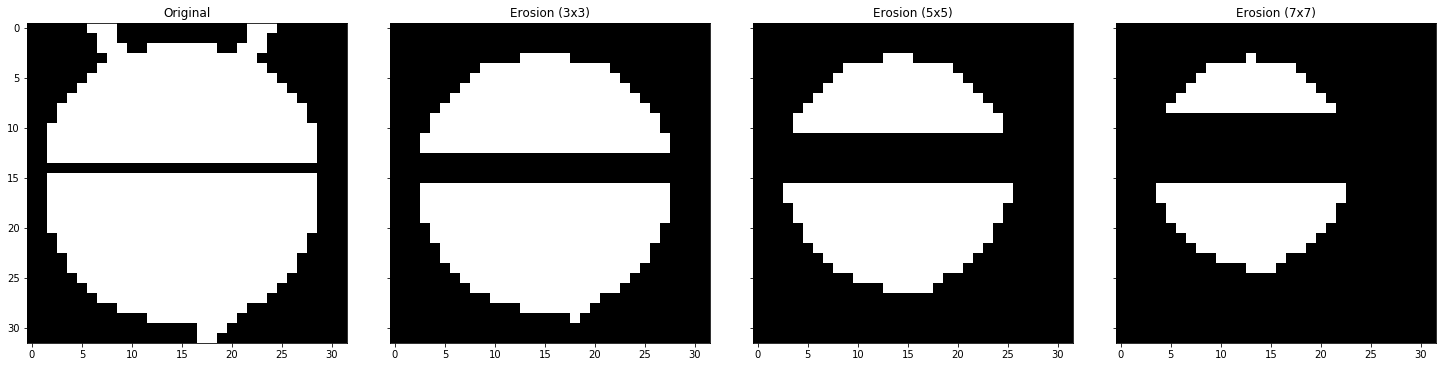

In [96]:
ico = io.imread("images/favicon.png", as_grey=True)
se1 = np.ones((3,3), dtype=np.uint8)
se2 = np.ones((5,5), dtype=np.uint8)
se3 = np.ones((7,7), dtype=np.uint8)

fig4 = plt.figure()
fig4.set_figwidth(100)
fig4.set_figheight(150)

fig4.subplots_adjust(left=0.05, right=0.95)
grid4 = AxesGrid(fig4, 141, nrows_ncols=(1, 4), axes_pad=0.6)

titles4 = ['Original', 'Erosion (3x3)', 'Erosion (5x5)', 'Erosion (7x7)']
sizes = ['3x3', '5x5', '7x7']

selems = [se1, se1, se2, se3]

grid4[0].set_title(titles4[0])
grid4[0].imshow(apply_threshold(ico), cmap=plt.cm.binary_r)
for i in range(1, len(titles4)):
    grid4[i].set_title(titles4[i])
    result = morph_filter('er', ico, sel=selems[i])
    io.imsave("test_images/erosion_{}_selem.png".format(sizes[i-1]), result*255)
    grid4[i].imshow(result, cmap=plt.cm.binary_r)

plt.savefig("images/filters-multiple-selem-sizes.png")

### How structuring elements looks like

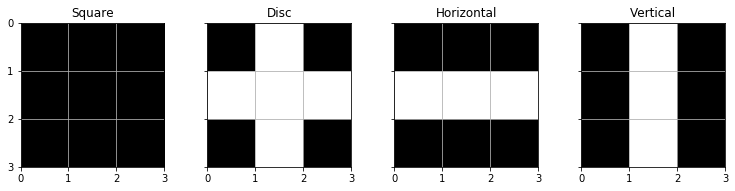

In [7]:
ee1 = np.ones((3,3), dtype=np.uint8)

ee2 = np.array([[0, 1, 0], 
               [1, 1, 1], 
               [0, 1, 0]], dtype=np.uint8)

ee3 = np.array([[0, 0, 0], 
               [1, 1, 1], 
               [0, 0, 0]], dtype=np.uint8)

ee4 = np.array([[0, 1, 0], 
               [0, 1, 0], 
               [0, 1, 0]], dtype=np.uint8)


fig5 = plt.figure()
fig5.set_figwidth(50)
fig5.set_figheight(120)

fig5.subplots_adjust(left=0.05, right=0.95)
grid5 = AxesGrid(fig5, 141, nrows_ncols=(1, 4), axes_pad=0.6)

titles5 = ['Square', 'Disc', 'Horizontal', 'Vertical']

ees = [ee1, ee2, ee3, ee4]

for i in range(len(titles5)):
    grid5[i].set_title(titles5[i])
    grid5[i].imshow(ees[i], cmap=plt.cm.binary_r)
    axes = grid5[i]
    axes.set_xticks(np.arange(-.5, 3, 1))
    axes.set_yticks(np.arange(-.5, 3, 1))
    axes.set_xticklabels(np.arange(0, 3 + 1, 1))
    axes.set_yticklabels(np.arange(0, 3 + 1, 1))
    grid5[i].grid(True)

plt.savefig("images/selem-types.png")

### Testing grayscale-mode filters

/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/grayscale_er.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/grayscale_di.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/grayscale_op.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/grayscale_cl.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/grayscale_ig.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/grayscale_eg.png is a low contrast image
  warn('%s is a low contrast image' % fname

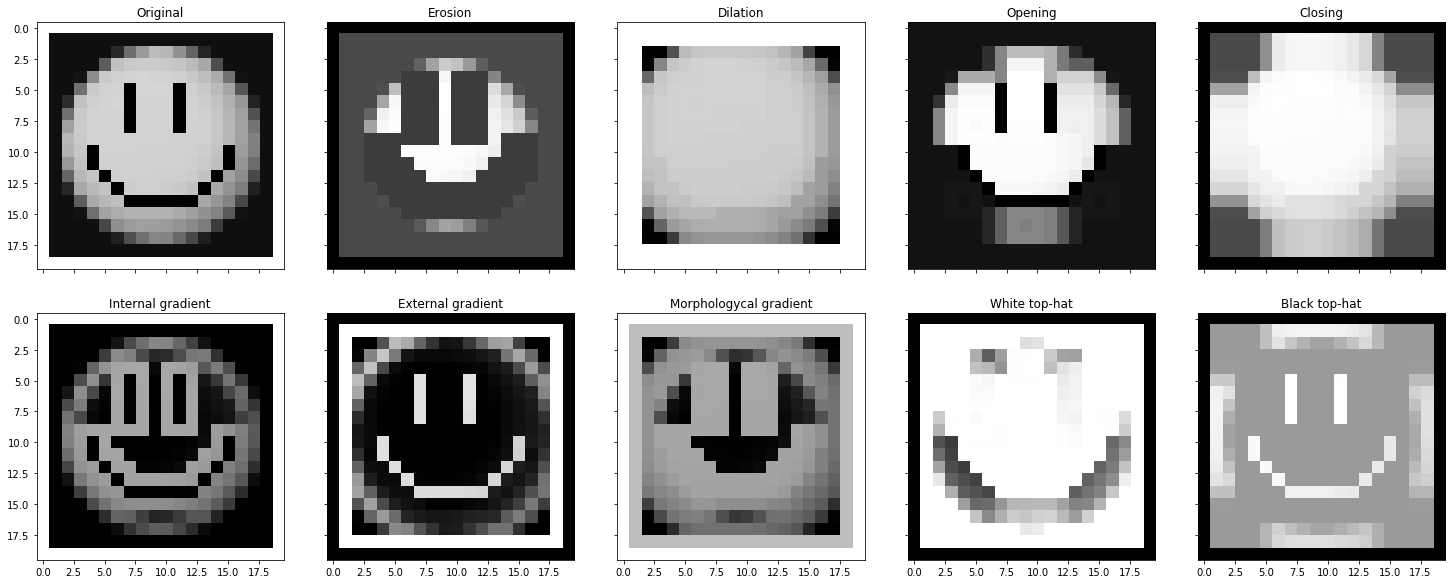

In [67]:
img = io.imread("images/smile.png", as_grey=True)
#img = (img * 255).astype(np.int64)

fig6 = plt.figure()
fig6.set_figwidth(100)
fig6.set_figheight(150)

fig6.subplots_adjust(left=0.05, right=0.95)
grid6 = AxesGrid(fig6, 141, nrows_ncols=(2, 5), axes_pad=0.6)

filters6 = ['original', 'er','di', 'op', 'cl', 'ig', 'eg', 'mg', 'wth', 'bth']
titles6 = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Internal gradient', 'External gradient', 'Morphologycal gradient', 'White top-hat', 'Black top-hat']

grid6[0].set_title(titles6[0])
grid6[0].imshow(img, cmap=plt.cm.binary_r)
for i, f in zip(range(1, len(filters6)), filters6[1:]):
    grid6[i].set_title(titles6[i])
    result = morph_filter(f, img, as_gray=True)
    result = (result*255).astype(np.int64)
    io.imsave("test_images/grayscale_{}.png".format(filters6[i]), np.abs(result))
    grid6[i].imshow(result, cmap=plt.cm.binary_r)

plt.savefig("images/filters-grayscale.png")

### Testing with made up images

In [9]:
test_img = np.array([[1,1,1,0], 
                  [1,1,1,1], 
                  [1,1,1,1],
                  [0,1,1,1]], dtype=np.uint8)

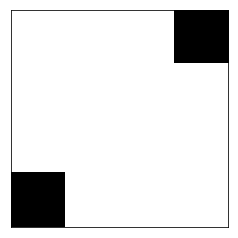

In [10]:
fm2 = FilterManager(ee)
fm2.show(test_img)

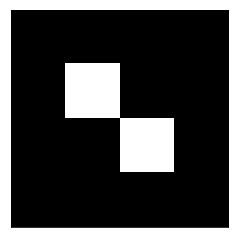

In [11]:
fm2.show(fm2.apply_filter('er', test_img))

In [12]:
test_img_2 = np.array([[0,  0, 1, 1, 0, 0], 
                       [0, 1, 1, 1, 1, 0], 
                       [1, 1, 1, 1, 1, 0],
                       [0, 1, 1, 1, 1, 0],  
                       [0, 0, 1, 1, 1, 0],
                       [0, 0, 1, 1, 0, 0]], dtype=np.uint8)

In [13]:
test_img_2.shape

(6, 6)

In [14]:
fm3 = FilterManager(ee)

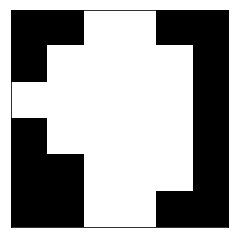

In [15]:
fm3.show(test_img_2)

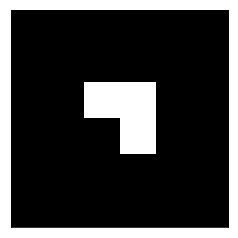

In [16]:
fm3.show(fm3.apply_filter('er', test_img_2))

In [17]:
test_img = np.array([[1,1,1,0], 
                  [1,1,1,1], 
                  [1,1,1,1],
                  [0,1,1,1]], dtype=np.uint8)
ee = np.ones((3,3))
ee2 = np.array([[0, 0, 0],
               [1, 1, 1],
               [0, 0, 0]])

ee3 = np.array([[1, 0, 0],
               [1, 0, 0],
               [1, 1, 1]])

fm5 = FilterManager(ee3)

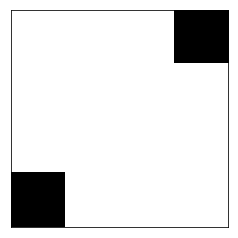

In [18]:
fm5.show(test_img)

CPU times: user 45.9 ms, sys: 2.55 ms, total: 48.4 ms
Wall time: 47.9 ms


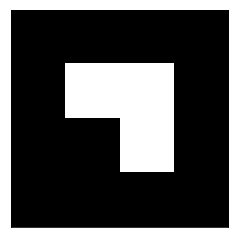

In [19]:
%time fm5.show(fm5.apply_filter('er', test_img))

CPU times: user 44.3 ms, sys: 6.22 ms, total: 50.6 ms
Wall time: 49.7 ms


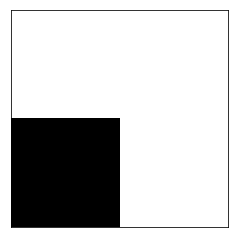

In [20]:
%time fm5.show(erosion(test_img, ee3))

### Testing morphologycal reconstruction

In [78]:
chars = io.imread("images/chars.bmp", as_grey=True)
ee = np.array([[0,1,0],
              [1,1,1],
              [0,1,0]], dtype=np.int64)
chars = 1 - chars

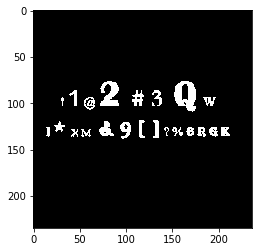

In [4]:
plt.imshow(chars, cmap=plt.cm.binary_r)

In [98]:
mark = morph_filter('er', chars, ee, 4)
io.imsave("test_images/morph_recon_mark.png", mark*255)

/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/morph_recon_mark.png is a low contrast image
  warn('%s is a low contrast image' % fname)


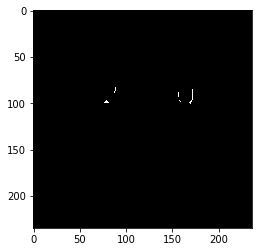

In [99]:
plt.imshow(mark, cmap=plt.cm.binary_r)
plt.savefig("images/morphologycal-mark.png")

In [106]:
reconstruction = morphologycal_reconstruction(mark, chars, False, n_iterations=1, sel=ee)

In [107]:
reconstruction*255

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

/usr/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_images/morph_recon.png is a low contrast image
  warn('%s is a low contrast image' % fname)


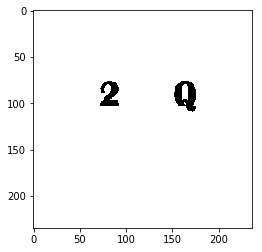

In [108]:
io.imsave("test_images/morph_recon.png", reconstruction*255)
plt.imshow(reconstruction, cmap=plt.cm.binary_r)
plt.savefig("images/morphologycal-reconstruction.png")